<a href="https://colab.research.google.com/github/mariuszkr33/ML/blob/main/Renew_Hackathon_Feature_Num_Col.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import helper as h

import importlib
importlib.reload(h)

import pandas as pd
import numpy as np
np.random.seed(2019)

from sklearn.preprocessing import minmax_scale

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold, GroupKFold, cross_val_score

from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import xgboost as xgb

from functools import partial
from hyperopt import hp
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv(r'/content/drive/MyDrive/ReNew_Participants_Data/train.csv')
df_test = pd.read_csv(r'/content/drive/MyDrive/ReNew_Participants_Data/test.csv')

In [ ]:
df = pd.concat([df_train, df_test])
df.shape

(1212806, 16)

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
df['year'] = df['timestamp'].dt.year
df['month'] = df['timestamp'].dt.month
df['day'] = df['timestamp'].dt.day
df['hour'] = df['timestamp'].dt.hour
df['minute'] = df['timestamp'].dt.minute
df['dayofyear'] = df['timestamp'].dt.dayofyear
df["dayofweek"] = df["timestamp"].dt.dayofweek

In [ ]:
df['turbine_id'] = df['turbine_id'].factorize()[0]

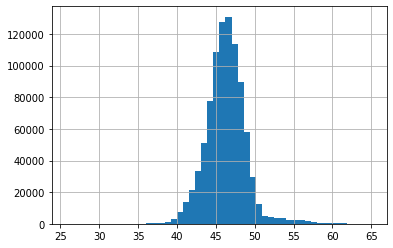

In [ ]:
df['Target'].hist(bins=50);

In [ ]:
feats = df.select_dtypes("number").columns
target_list = ["Target"]
feats = [x for x in feats if x not in target_list]

In [ ]:
df_train = df[ df["Target"].notnull() ].copy()
df_test = df[ df["Target"].isnull() ].copy()

X_train = df_train[feats].values
y_train = df_train["Target"].values
X_test = df_test[feats].values

In [ ]:
cv = GroupKFold(n_splits=5)

model = xgb.XGBRegressor(max_depth=7, n_estimators=100, learning_rate=0.1, random_state=0)
scores = cross_val_score(model, X_train, y_train, groups=df_train["turbine_id"], cv=cv, scoring="neg_mean_absolute_percentage_error")
print("score: ", np.mean(scores), "std: ", np.std(scores))

[09:46:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:51:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:57:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:04:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[10:09:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score:  -0.03503799850197485 std:  0.0079949878829079


In [ ]:
feats

['active_power_calculated_by_converter',
 'active_power_raw',
 'ambient_temperature',
 'generator_speed',
 'generator_winding_temp_max',
 'grid_power10min_average',
 'nc1_inside_temp',
 'nacelle_temp',
 'reactice_power_calculated_by_converter',
 'reactive_power',
 'wind_direction_raw',
 'wind_speed_raw',
 'wind_speed_turbulence',
 'turbine_id',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'dayofyear',
 'dayofweek']

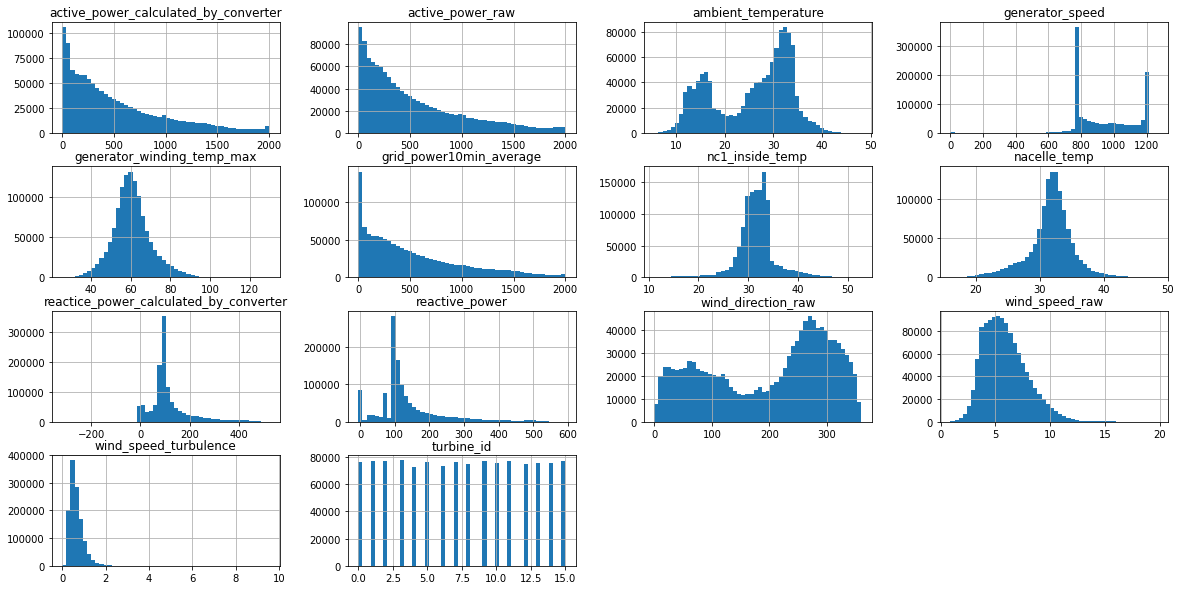

In [ ]:
df[feats].hist(figsize=(20, 10), bins=50);

CPU times: user 1.55 s, sys: 89.1 ms, total: 1.64 s
Wall time: 1.76 s


(15.5, -0.5)

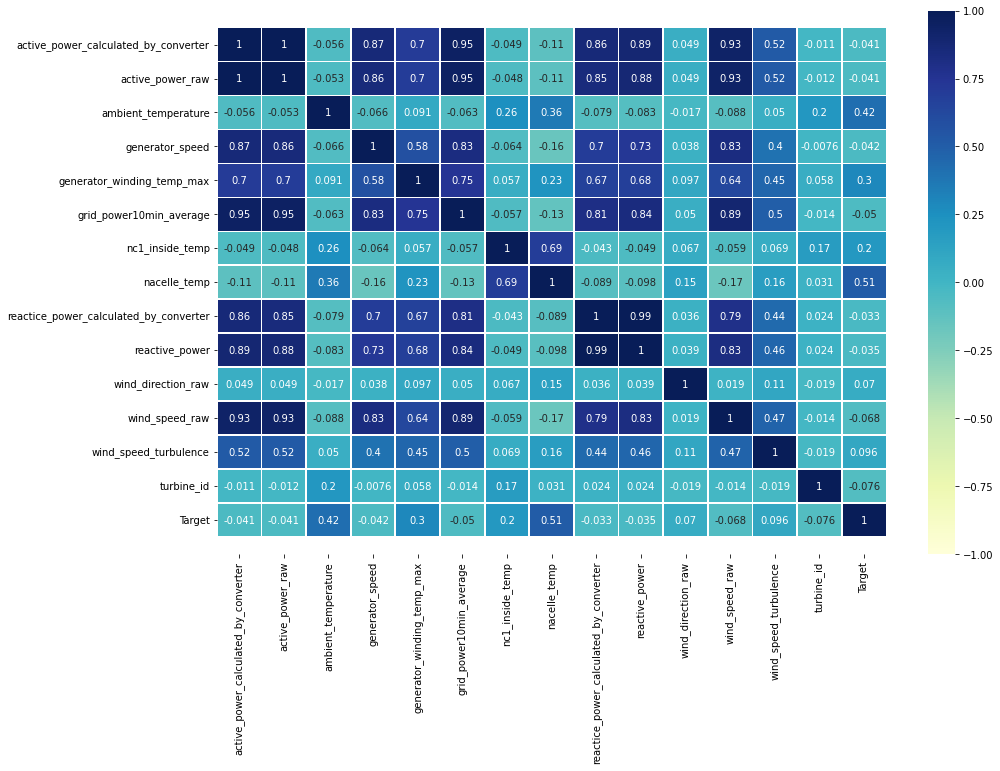

In [ ]:

plt.rcParams['figure.figsize']=(15,10)
%time ax = sns.heatmap(df.corr(), vmax=1., vmin=-1., annot=True, linewidths=.8, cmap="YlGnBu");
# korekta błędu w matplotlib, który ucina krawędzie heatmapy
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [ ]:
df.columns

Index(['timestamp', 'active_power_calculated_by_converter', 'active_power_raw',
       'ambient_temperature', 'generator_speed', 'generator_winding_temp_max',
       'grid_power10min_average', 'nc1_inside_temp', 'nacelle_temp',
       'reactice_power_calculated_by_converter', 'reactive_power',
       'wind_direction_raw', 'wind_speed_raw', 'wind_speed_turbulence',
       'turbine_id', 'Target', 'year', 'month', 'day', 'hour', 'minute',
       'dayofyear', 'dayofweek'],
      dtype='object')

In [ ]:
df.columns = ['timestamp', '1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9' , '10' , '11' , '12' , '13' , 'turbine_id', 'Target', 'year', 'month', 'day', 'hour', 'minute',
       'dayofyear', 'dayofweek']

In [ ]:
df.columns

Index(['timestamp', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', 'turbine_id', 'Target', 'year', 'month', 'day', 'hour',
       'minute', 'dayofyear', 'dayofweek'],
      dtype='object')

In [ ]:
df.sample()

,timestamp,1,2,3,4,5,6,7,8,9,...,13,turbine_id,Target,year,month,day,hour,minute,dayofyear,dayofweek
675769,2021-11-21 23:14:00,276.412613,271.800858,33.692603,805.696228,63.6277,382.326879,33.366579,32.716419,94.105541,...,0.589311,13,46.633335,2021,11,21,23,14,325,6


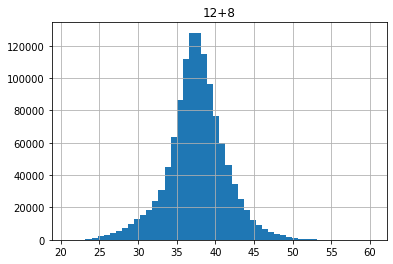

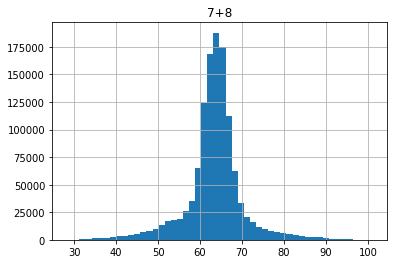

In [ ]:
sum_pairs = [
    
    (12, 8),
    
    (7, 8),
    
]
sum_feats = []

for left, right in sum_pairs:
    output_idx = '{0}+{1}'.format(left, right)
    df[output_idx] = df['{0}'.format(left)] + df['{0}'.format(right)]
    sum_feats.append(output_idx)
    
    df[output_idx].hist(bins=50);
    plt.title(output_idx)
    plt.show()

In [ ]:
sum_feats

['12+8', '7+8']

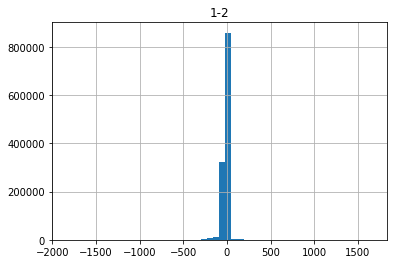

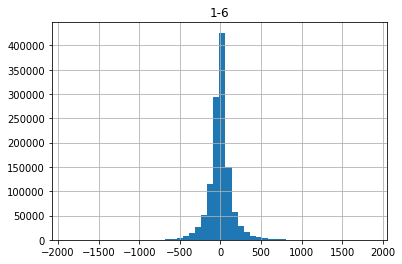

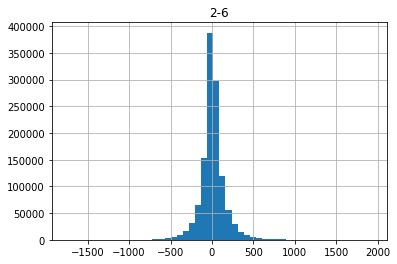

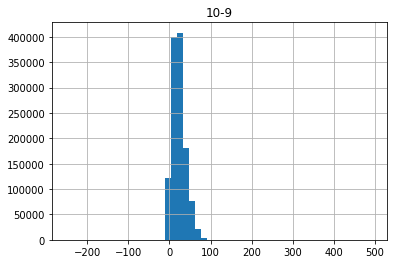

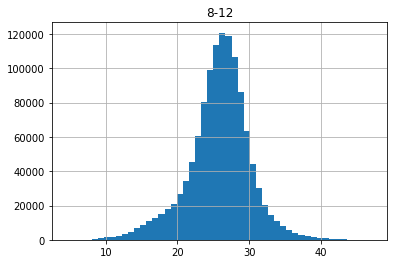

In [ ]:
minus_pairs = [
    (1, 2),
    (1, 6),
    (2, 6),
    (10, 9),
    (8, 12),
]
minus_feats = []

for left, right in minus_pairs:
    output_idx = '{0}-{1}'.format(left, right)
    df[output_idx] = df['{0}'.format(left)] - df['{0}'.format(right)]
    minus_feats.append(output_idx)
    
    df[output_idx].hist(bins=50);
    plt.title(output_idx)
    plt.show()

In [ ]:
minus_feats

['1-2', '1-6', '2-6', '10-9', '8-12']

In [ ]:
feats

['active_power_calculated_by_converter',
 'active_power_raw',
 'ambient_temperature',
 'generator_speed',
 'generator_winding_temp_max',
 'grid_power10min_average',
 'nc1_inside_temp',
 'nacelle_temp',
 'reactice_power_calculated_by_converter',
 'reactive_power',
 'wind_direction_raw',
 'wind_speed_raw',
 'wind_speed_turbulence',
 'turbine_id',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'dayofyear',
 'dayofweek']

In [ ]:
feats = ['1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9' , '10' , '11' , '12' , '13' , 'turbine_id', 'year', 'month', 'day', 'hour', 'minute',
       'dayofyear', 'dayofweek']

In [ ]:
feats_to_norm = ['1' , '2' , '3' , '4' , '5' , '6' , '7' , '8' , '9' , '10' , '11' , '12' , '13']
[ (feat, df[feat].skew()) for feat in feats_to_norm ]

[('1', 1.0939202227787923),
 ('2', 1.0783015473979878),
 ('3', -0.4061135623518691),
 ('4', -0.42999297051401775),
 ('5', 0.48154144195682724),
 ('6', 1.007058693464548),
 ('7', 0.0378233780856397),
 ('8', -0.4286767970155705),
 ('9', 1.7304222030640295),
 ('10', 1.6377037152934544),
 ('11', -0.36457163564824724),
 ('12', 0.7160872431418943),
 ('13', 2.1616910093649353)]

In [ ]:
for feat in tqdm(feats_to_norm):
    if df[feat].skew() < 0.25: continue
    df[feat + '_sqrt'] = np.sqrt( minmax_scale(df[feat]) )
    df[feat + '_log1p'] = np.log1p( minmax_scale(df[feat]) )
    
sqrt_cont_feats = [feat for feat in df.columns if  'sqrt' in feat]
log_cont_feats = [feat for feat in df.columns if 'log' in feat]

100%|██████████| 13/13 [00:00<00:00, 18.22it/s]


In [ ]:
feats = feats + sum_feats + minus_feats + sqrt_cont_feats + log_cont_feats
feats

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 'turbine_id',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'dayofyear',
 'dayofweek',
 '12+8',
 '7+8',
 '1-2',
 '1-6',
 '2-6',
 '10-9',
 '8-12',
 '12+8',
 '7+8',
 '1-2',
 '1-6',
 '2-6',
 '10-9',
 '8-12',
 '1_sqrt',
 '2_sqrt',
 '5_sqrt',
 '6_sqrt',
 '9_sqrt',
 '10_sqrt',
 '12_sqrt',
 '13_sqrt',
 '1_log1p',
 '2_log1p',
 '5_log1p',
 '6_log1p',
 '9_log1p',
 '10_log1p',
 '12_log1p',
 '13_log1p']

In [ ]:
df.head()

,timestamp,1,2,3,4,5,6,7,8,9,...,11,12,13,turbine_id,Target,3+7,4+8,7+11,10+13,8+12
0,2021-02-19 20:18:00,816.636759,834.917206,31.694380,1159.616602,65.954214,917.897085,31.881972,31.504713,141.457644,...,280.864782,7.057000,0.544082,0,47.582787,63.576351,1191.121315,312.746753,166.045600,38.561713
1,2021-04-27 04:55:00,419.107829,421.050873,12.894948,928.747996,59.571319,445.554250,32.423705,32.755770,89.186457,...,299.552460,5.474937,0.469031,1,46.070328,45.318653,961.503766,331.976164,114.304267,38.230707
2,2021-01-25 06:26:00,1303.530558,1337.566142,16.648388,1201.219775,61.270498,1364.716003,11.446849,18.332985,230.622309,...,84.960106,8.092457,0.622318,2,39.989236,28.095237,1219.552760,96.406955,282.074571,26.425442
3,2021-10-30 03:47:00,61.494872,53.481008,28.388141,769.806122,40.674348,14.324897,34.253204,32.662889,66.211015,...,87.261119,4.071032,0.760719,3,46.056587,62.641346,802.469011,121.514323,75.778250,36.733921
4,2021-03-15 00:39:00,593.514364,611.659108,31.519527,1046.916768,64.341763,599.020172,32.405586,31.466387,137.163938,...,313.724818,6.357943,0.346068,4,54.346095,63.925113,1078.383156,346.130404,160.548489,37.824330


In [ ]:
df_train = df[ df["Target"].notnull() ].copy()
df_test = df[ df["Target"].isnull() ].copy()

X_train = df_train[feats].values
y_train = df_train["Target"].values
X_test = df_test[feats].values

In [ ]:
cv = GroupKFold(n_splits=5)

model = xgb.XGBRegressor(max_depth=5, n_estimators=50, learning_rate=0.1, random_state=0)
scores = cross_val_score(model, X_train, y_train, groups=df_train["turbine_id"], cv=cv, scoring="neg_mean_absolute_percentage_error")
print("score: ", np.mean(scores), "std: ", np.std(scores))

[12:55:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:01:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:06:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:11:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
score:  -0.03534896425526822 std:  0.007960727494508265


In [ ]:
h.plot_feature_importances(model, feats, limit=30)